# Exercice 1

### Architecture A

**Artificials neural networks** (ANN) are made of an input layer, one or multiple hidden layers and an output layer. Each layer is made of nodes, which process the input data with functions and create outputs. Here, we're aiming to build a **fully connected neural network**. This means that each nodes from a layer is connected to each nodes of the next layer. Fully connected networks works only with vectors, so we'll have to reshape our data for this exercise since images are 2D matrixes. Flattening the data leads to a **loss of information** (we don't know which pixel is next to which one by passing 2D data to 1D). We can avoid this with **convolutional neural networks**, that we'll see in architecture B. 

When constructing an ANN, we must define how many layers it includes, how many nodes are in these layers and what function these nodes use. There is no direct interpretation that can be made from the number of layers and nodes for the network, we will choose these numbers arbitrarily. We also could have used grid search (GridSearchCV from scikit learn) to tune the hyperparameters. Since this is the first neural network that we build, we'll follow the architecture chosen here : 

https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

For this first neural network, we'll create a simple architecture with a double-layered neural network :

- The first layer (the single hidden layer) will be composed of 32 neurons and will include the **sigmoid activation function**. The sigmoid (logistic) function transforms the input into values between 0 and 1. It is widely used in neural network architecture because it is convenient to predict the probability of the output due to its range of values. 

- The second layer (the output) is composed of 10 neurons (such as the number of possible outputs in our data), and uses the **softmax activation function**. The softmax function is similar to the sigmoid activation function, all values that pass through are scaled between 0 and 1, and their sum is 1. This way, outputs can be interpreted as a probability distribution. Softmax is mainly used for multi-classification while the sigmoid function is used in binary classification but they both work for logistic regression. With softmax, in order to increase the probability that a number is correctly classified, the probabilities for other numbers to be classified need to decrease. The number with the highest probability is then selected for the prediction.

For the tuning of the model, we'll use the following hyper-parameters :
- the **stochastic gradient descent** for the optimizer, the classic algorithm used to update the weights of each layer which works well for small neural networks like this one.
An interesting feature of the SGD is that it takes a random sample of training data at each step and then computes the gradient, which makes it much faster because there is much less data to manipulate at one time. However, when it reaches a value close to the minimum, it does not stabilize but “bounce”. It gives us a good but not optimal value for the parameters. This can be avoided by adaptively reducing the learning rate at each step as we get closer to the minimum.
- the **categorical cross entropy** for the loss function, which works with one-hot-encoded outputs like in our case. 
 We have several classes that are exclusive to each other, so that we want to predict a single label among the 10. To reach this output, the last layer uses a softmax activation function which returns an array of 10 probability scores (summing to 1). The highest probability will be selected as the predicted value. We will then be able to compute the accuracy of the prediction, ie the percentage of correctly predicted images.  
To measure the "loss" of the prediction, each vector of probability scores is compared with its corresponding true value. Reminds that the true values have been one-hot-encoded meaning that 1 appears in the vector to the corresponding correct category, else a 0 appears. Then, if the predicted vector is far from the true values vector, it will increases the loss.

- 5 **epochs**, the number of times the training data is given to the model. With a lot of epochs, the model could cause overfitting but a small number can limit our results. 
- 128 **batch size**, the number of patterns given to the network before the matrix of weights is updated



### Architecture B

**Convolutionals neural networks** (CNN) are a type of ANN. The first architecture was a fully connected network and these type of networks can be subject to **overfitting**. Indeed, with fully connected networks, there is a lot of parameters to learn. In the MNIST case, each image is 28 x 28 pixels, 784 in total. The first layer has 32 neurons, which creates nearly 25 000 parameters just for the input layer. With a lot of parameters, the model knows too well the training data, which can lead to poor results on the test set. To avoid overfitting, CNN use **regularization**. Regularization allows to control the weights assigned to each parameter to reduce their impact on the loss function.

In a CNN, the input is a **tensor** (matrix with more than 2 dimensions). Convolutional layers allows to reduce the number of parameters (informations) by "filtering" the input data through a **convolutional matrix** (kernel). Since convolution increases the dimension, we use it with **pooling layers** to aggregate the values obtained and sort a pooled image with a lower dimension.

For this second neural network, we'll use the structure found on the Keras website :

https://keras.io/examples/vision/mnist_convnet/

Our CNN will be composed of 7 layers :

- The first input layer will perform a 2D convolution with a 3x3 kernel matrix with 32 output filters. The activation function is the common ReLU (rectified linear unit), which replaces negative values with 0 and also introduces non linearities. 

- Then the output of the Conv2D get through a pooling layer which keeps the maximum value (MaxPooling2D). The output of the pooling layer is a 2 x 2 matrix, effectively reducing the dimension of the input.

- The second hidden layer is another convolutional layer, with 64 output filters which also pass through a similar pooling layer. 

- Then we flatten the data through a flatten layer to pass the outputs through the next layers. 

- Regularization plays a role in the dropout layer. The principle of the dropout layer is that it drop random nodes based on a probability. Here the probability is 0.5 so half of the nodes will be dropped. By removing layers, the model is less subject to overfitting since parameters are volontarily lost. 

- Finally, we use a classic dense layer with 10 possible outputs for our 10 numbers and the softmax activation function for probabilities. 

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

## MODEL A : Artificials neural networks 

### Loading & split

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#Make a copy of the dataset before flattening to vizualise
x_train_drawing = X_train
x_test_drawing = X_test

### Data exploration

In [ ]:
X_train.shape

(60000, 28, 28)

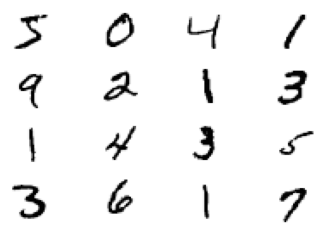

In [ ]:
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[i], cmap='Greys')

### Images reshape (fully connected networks work only with vectors)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [ ]:
X_train.shape

(60000, 784)

### One Hot Encoding

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Building the model

In [ ]:
model = Sequential()
model.add(Dense(units=32, #Number of nodes
                activation='sigmoid', # Way of computing the output for the next layer
                input_shape=(28*28,) #Should match the shape of the training data
                ))
model.add(Dense(units=10, #Number of possible output ([0:9])
                activation='softmax' # A softmax function because of one-hot encoding
                ))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Model diagram

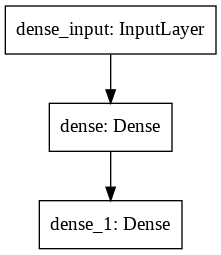

In [ ]:
plot_model(model)

### Model compiling

In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)

### Model evaluation

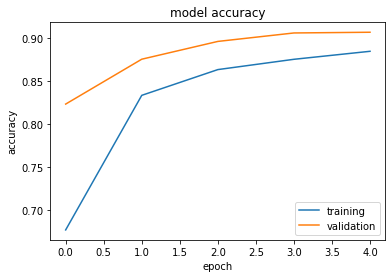

Loss : 0.4714271128177643
Accuracy : 0.8919000029563904


In [ ]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print("Loss : " + str(loss))
print("Accuracy : " + str(accuracy))

In [ ]:
pred = model.predict(X_test) 
pred = np.argmax(pred, axis = 1)[:10] 

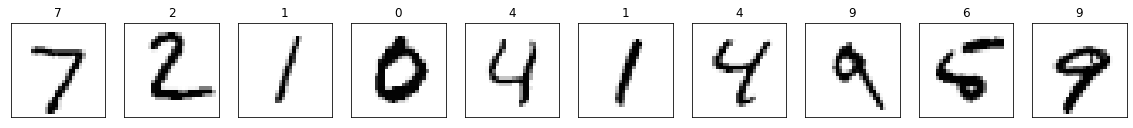

In [ ]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
             sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(pred[i])
    axes[i].imshow(x_test_drawing[i], cmap='Greys')
    #Delete the axis legend
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

Seulement une prédiction sur 10 a été mal classifiée, ce qui correspond bien à 90% de précision sur ce modèle.

## MODEL B : Convolutional Neural Network

### Load & split

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Data reshape

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### One Hot Encoding

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Building the model

In [ ]:
model = Sequential()

model.add(Conv2D(32, #Number of nodes in the layer
                 kernel_size = (3, 3),#Size of the convolutional Kernel, the filter that pass through the image
                 activation='relu', #Activation function
                 input_shape=(28, 28, 1)
                 ))
model.add(MaxPooling2D(pool_size=(2, 2))) # A pooling layer 
model.add(Conv2D(64, kernel_size = (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5)) #Regularization layer 
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

### Model diagram

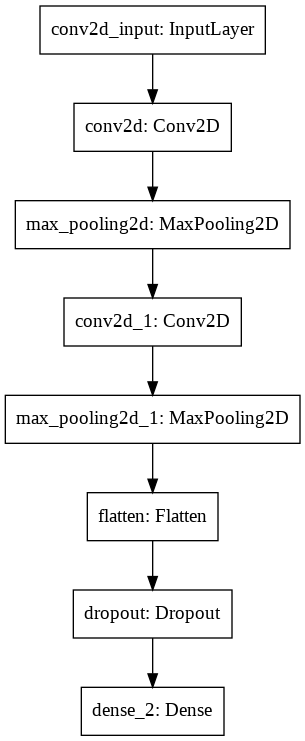

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 44s 102ms/step - loss: 0.3707 - accuracy: 0.8881 - val_loss: 0.0859 - val_accuracy: 0.9768
Epoch 2/5
422/422 [==============================] - 43s 101ms/step - loss: 0.1117 - accuracy: 0.9662 - val_loss: 0.0579 - val_accuracy: 0.9842
Epoch 3/5
422/422 [==============================] - 43s 102ms/step - loss: 0.0836 - accuracy: 0.9743 - val_loss: 0.0457 - val_accuracy: 0.9882
Epoch 4/5
422/422 [==============================] - 43s 101ms/step - loss: 0.0703 - accuracy: 0.9777 - val_loss: 0.0414 - val_accuracy: 0.9883
Epoch 5/5
422/422 [==============================] - 42s 101ms/step - loss: 0.0620 - accuracy: 0.9804 - val_loss: 0.0387 - val_accuracy: 0.9895


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.03370944783091545
Test accuracy: 0.9890000224113464


### Model Evaluation

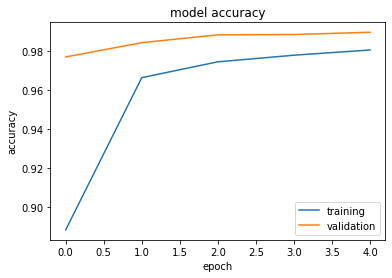

Loss : 0.03370944783091545
Accuracy : 0.9890000224113464


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print("Loss : " + str(loss))
print("Accuracy : " + str(accuracy))

In [ ]:
pred = model.predict(x_test) 
pred = np.argmax(pred, axis = 1)[:10] 

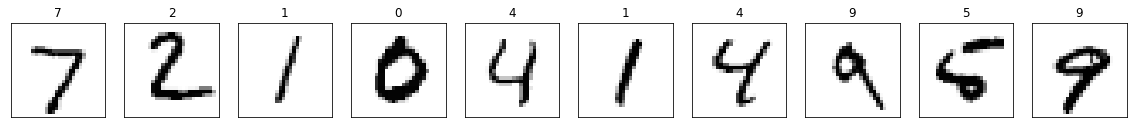

In [ ]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
             sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(pred[i])
    axes[i].imshow(x_test_drawing[i], cmap='Greys')
    #Delete the axis legend
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

Sur 10 prédictions, l'intégralité a été bien classifiée, ce qui correspond au taux de précision de 99% environ. 

# Exercice 2

### Imports

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
from sklearn import utils
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

### Architecture


Here the goal is to predict a binary classification, is the picture a number or a random amount of pixels.
For this neural network, we'll create a **ANN** architecture with a tripled-layered neural network :

- The first and second layer  will be composed of 512 neurons and will include the **rectified linear unit (ReLU) activation function**. The Relu is a linear function that will output the input directly if it is positive, otherwise, it will output zero.

- The last layer (the output) is composed of 1 neurons wich give a prediction between 0 and 1 of the probability to be a number or not. It uses the **sigmoïd activation function**, i.e. the function that transforms the input into values between 0 and 1. 

For the tuning of the model, we'll use the following hyper-parameters :
- the **adaptive moment estimation (ADAM)** for the optimizer, it keeps track of an exponentially decaying average of past gradient and past squared gradients.
- the **binary cross entropy** for the loss function,it compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value.
- 15 **epochs**, the number of times the training data is given to the model. With a lot of epochs, the model could cause overfitting but a small number can limit our results. 
- 128 **batch size**, the number of patterns given to the network before the matrix of weights is updated

### Creating random images for train & test

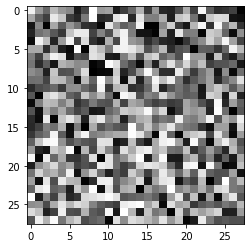

In [ ]:
images_train = []

for i in range(30000):

  X = np.random.random((28, 28))
  images_train.append(X)

images_train = np.array(images_train)

for X in images_train[0:1]:

  plt.imshow(X, cmap="gray") 
  plt.show() 

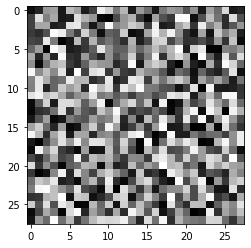

In [ ]:
images_test = []

for i in range(10000):

  X = np.random.random((28, 28))
  images_test.append(X)

images_test = np.array(images_test)

for X in images_test[0:1]:

  plt.imshow(X, cmap="gray") 
  plt.show() 

### Loading MNIST data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train = X_train[0:30000]

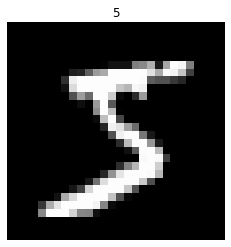

In [ ]:
for i in range(1): 
  
    image = X_train[i]
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
    plt.title(y_train[i])
    plt.show()

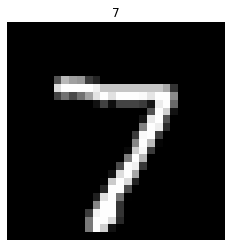

In [ ]:
for i in range(1): 
  
    image = X_test[i]
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
    plt.title(y_test[i])
    plt.show()

### Concatening & shuffling MNIST with random images

In [ ]:
X_train = np.concatenate([X_train,images_train])
X_test = np.concatenate([X_test,images_test])

In [ ]:
y_train_1 = np.full((30000, 1), 1)
y_train_0 = np.full((30000, 1), 0)
y_test_1 = np.full((10000, 1), 1)
y_test_0 = np.full((10000, 1), 0)

In [ ]:
y_train = np.concatenate([y_train_1,y_train_0], axis = 0)
y_test= np.concatenate([y_test_1,y_test_0], axis = 0)

In [ ]:
X_train, y_train = utils.shuffle(X_train, y_train)
X_test, y_test = utils.shuffle(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


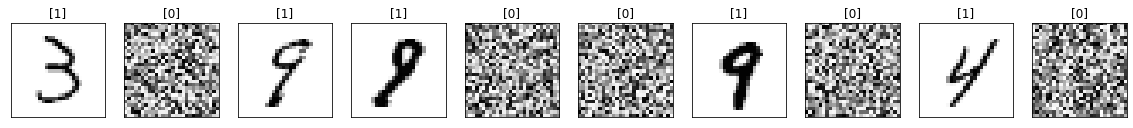

In [ ]:
# Display some observation of the train subsample
fig, axes = plt.subplots(ncols=10, sharex=False,
             sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='Greys')
    #Delete the axis legend
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


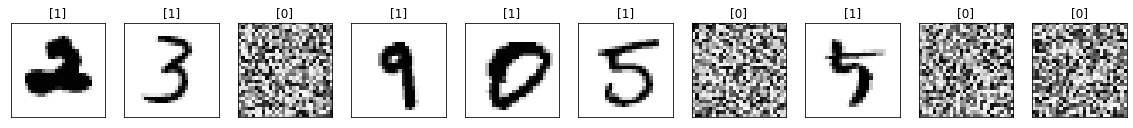

In [ ]:
# Display some observation of the test subsample
fig, axes = plt.subplots(ncols=10, sharex=False,
             sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='Greys')
    #Delete the axis legend
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Make a copy of the dataset before flattening to vizualise
x_test_drawing = X_test

### Reshaping data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

### Building the model

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 8.864944334163738e-09
Test accuracy: 1.0


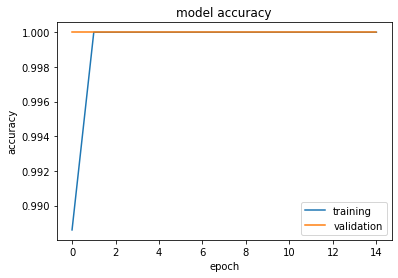

Loss : 8.864944334163738e-09
Accuracy : 1.0


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print("Loss : " + str(loss))
print("Accuracy : " + str(accuracy))

In [ ]:
pred = model.predict(X_test)[:10].astype(int)
label = y_test[:10]

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


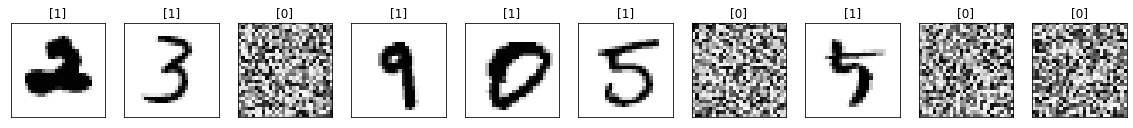

In [ ]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
             sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(pred[i])
    axes[i].imshow(x_test_drawing[i], cmap='Greys')
    #Delete the axis legend
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Exercice 3

The fashion MNIST dataset was created by the brand Zalando. It is composed of 70000 grayscale 28x28 images of clothes that fit in 10 different categories (trouser, shirt, coat...). Very similar to the classic MNIST dataset in its form, it is meant to introduce more challenge because clothes are harder to classify than handwritten digits.

The objective here is to classify as best as possible all clothes images of the test dataset, by making our model learn as best as possible without overfitting the train dataset.

Then, we are in a multiclass classification task aiming to predict the correct cloth among the ten present in the dataset.
Again, the dataset is perfectly balanced as we have 7000 sample for each class. We will be able to directly interpret the accuracy without worrying about whether a class was predicted more often because it is more represented.

In this last exercise, we'll present an ANN architecture with 6 layers :

- Our first layer is CNN which is widely use in our application to avoid overfitting as previously said. We set a 3x3 kernel filter and we keep the strides default of (1,1) meaning that the filter take a 1 pixel step to the right and again the filter is applied to the input sample and we repeat the operation until we reach the far right border of the input sample in which we are moving our filter. We keep 32 output filters and  The rectified linear unit as activation function.

- The output of the convolutional NN is aggregated in a 2x2 matrix by keeping the maximum value of the convolution matrix. This is a pooling layer and the technique associated is the max pooling layer. Until now, we have reduced the dimension of our starting output and we estimate a relatively low number of parameters thanks to our CNN.  

- We now use a flatten layer to vectorize our output matrix. This vector is a new input for the next layer. 

-	Then, we implement a fully connected layer composed of a hundred of neurons with the same activation function as for the CNN, the rectified linear unit activation function.  

- Before trying to predict the correct label, we hide some information to the next layer to prevent overfitting. It is a regularization approach which help to reduce interdependent learning by hidding information. In practice, we allow each of the 100 neurons to be dropped out with a probability of 0.5. If so, incoming and outgoing edges are removed from the network. 
In presence of dropout, training time for each epoch is faster but the algorithm take longer to converge. We have to increase the number of epochs.

- The last layer, the output layer, is not different from the one presented in exercise 1. We have a number of neurons equal to the number of output and the activation function is still the softmax.


Concerning the tuning of the model, we have used the following hyperparameters: 

As previously explained with the dropout layer, we set a higher number of epochs than in exercise 1 allowing the present algorithm to converge.


In [ ]:
import tensorflow as tf 
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
y = np.concatenate([y_train,y_test], axis = 0)

In [ ]:
stats = pd.DataFrame(y)

In [ ]:
stats.value_counts()

9    7000
8    7000
7    7000
6    7000
5    7000
4    7000
3    7000
2    7000
1    7000
0    7000
dtype: int64

As we can see, all categories are equally represented in the dataset

In [ ]:
print("train shape :", X_train.shape)
print("test shape :", X_test.shape)

train shape : (60000, 28, 28)
test shape : (10000, 28, 28)


In [ ]:
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

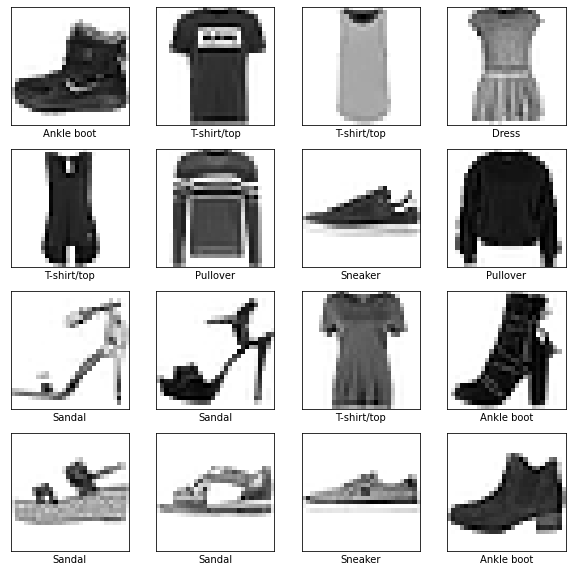

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(categories[y_train[i]])

In [ ]:
x_train_drawing = X_train
x_test_drawing = X_test


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               540900    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

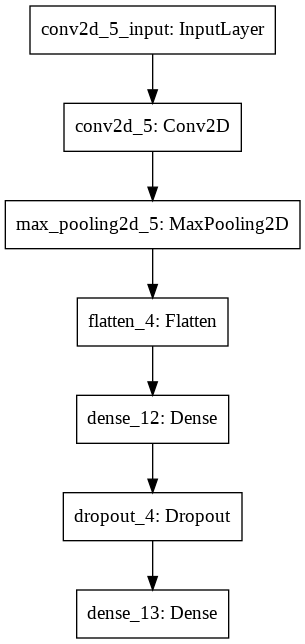

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)

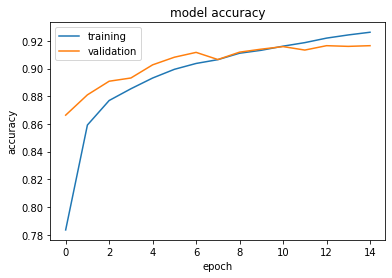

Loss : 0.2476062923669815
Accuracy : 0.9117000102996826


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss : " + str(loss))
print("Accuracy : " + str(accuracy))

In [ ]:
pred = model.predict(X_test) 
pred = np.argmax(pred, axis = 1)[:10]

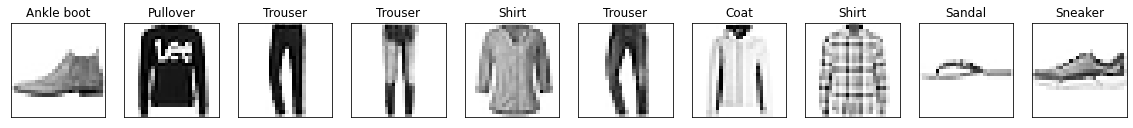

In [ ]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
             sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(categories[pred[i]])
    axes[i].imshow(x_test_drawing[i], cmap='Greys')
    #Delete the axis legend
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Takeaway

ANN can become computationally expensive very quickly because of the number of parameters to estimate and the number of iterations needed for algorithms to converge. For simple tasks that we focus on, it is not a severe issue.  Indeed, the most complex network will not necessarily be the one with the best results. Also, through the different exercises, we were able to implement in our network various techniques like convolutional neural networks which reduce computation but do not decrease accuracy or increase the score of the loss function. On the contrary, it can lead to better results. Yet, tuning of the hyperparameters remains an important step in order to get the best of your neural network.